In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk import pos_tag
from nltk import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

In [2]:
df = pd.read_csv('data/judge-1377884607_tweet_product_company.csv',encoding='latin1')

#### Rename columns for simplicity

In [3]:
df.rename(columns = {'emotion_in_tweet_is_directed_at': 'Product', 'is_there_an_emotion_directed_at_a_brand_or_product': 'Emotion', 'tweet_text': 'Text'}, inplace= True)

In [4]:
df.drop(9092, inplace=True)
df.reset_index(drop=True, inplace=True)

#### LowerCase tweets for ease of use

In [5]:
df['Text'] = df['Text'].str.lower()
df['Text'] = df['Text'].str.replace(r'[^\w\s]', '')
df['Text'] = df['Text'].str.split(' ')

<ipython-input-5-776818975cf9>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace(r'[^\w\s]', '')


In [6]:
df.dropna(subset=['Text'], inplace=True)

In [7]:
df['Product'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: Product, dtype: int64

In [8]:
df['test'] = ''
df.fillna('na', inplace=True)

In [9]:
apple_keywords = ['apple', '#apple', 'ipad', '#ipad', '#iphone', 'iphone', 'itunes', '#itunes', 'ios', 'airpods', '#ios', '#airpods'
                 'iphones', 'ipads', 'apples', 'quotapple', 'quotipad', 'ipadquot', 'quotipads', 'ipadsquot', 'applequot', 'quotiphone', 'iphonequot', 'quotios', 'iosquot', 'quotiphones', 'iphonesquot', 'ipad2']
google_keywords = ['google', '#google', 'android', '#android', 'googles', 'androids', 'quotgoogle', 'googlequot', 'quotandroid', 'androidquot', 'quotandroids', 'androidsquot' ]

for ind, val in enumerate(df['Text']):
    if df['Product'].values[ind] == 'na':
        for y in val:
            if y in apple_keywords:
                df['test'].values[ind] = y
            elif y in google_keywords:
                df['test'].values[ind] = y
                
    else:
        df['test'].values[ind] = df['Product'].values[ind]




In [10]:
df['test'] = df['test'].map(lambda x: x.lower())
df['test'].unique()

array(['iphone', 'ipad or iphone app', 'ipad', 'google', 'android',
       'apple', 'android app', 'other google product or service',
       'itunes', '', 'quotgoogle', 'ipad2', 'googles', 'ipads',
       'applequot', 'ios', 'apples', 'ipadquot',
       'other apple product or service', 'quotipad', 'iosquot',
       'quotiphone', 'androidquot', 'googlequot', 'quotapple', 'androids',
       'iphonequot'], dtype=object)

In [11]:
df['test'] = df['test'].replace({'googles': 'google', 'apples': 'apple', 'androids': 'android','ipads': 'ipad', 'ipad2': 'ipad',
                                'quotgoogle': 'google', 'ipadquot': 'ipad', 'quotipad': 'ipad', 'androidquot': 'android', 'applequot': 'apple',
                               'googlequot': 'google', 'iphonequot': 'iphone', 'quotapple' : 'apple', 'iosquot': 'ios', 'quotiphone': 'iphone'})
df['test'].unique()

array(['iphone', 'ipad or iphone app', 'ipad', 'google', 'android',
       'apple', 'android app', 'other google product or service',
       'itunes', '', 'ios', 'other apple product or service'],
      dtype=object)

In [12]:
df['Emotion'].value_counts(normalize=True)

No emotion toward brand or product    0.592564
Positive emotion                      0.327577
Negative emotion                      0.062699
I can't tell                          0.017160
Name: Emotion, dtype: float64

In [13]:
emotion_dict = {'No emotion toward brand or product' : 'Neutral emotion', "I can't tell": 'Neutral emotion', 'Positive emotion': 'Positive emotion',
               'Negative emotion': 'Negative emotion'}
df['Emotion'] = df['Emotion'].map(emotion_dict)

In [14]:
df['test'].value_counts()

ipad                               2286
google                             2087
apple                              1496
iphone                             1052
                                    840
ipad or iphone app                  470
android                             379
other google product or service     293
android app                          81
itunes                               64
other apple product or service       35
ios                                   8
Name: test, dtype: int64

In [15]:
def company_search(test):
    if test == 'iphone':
        return 'apple'
    elif test == 'apple':
        return 'apple'
    elif test == 'ipad':
        return 'apple'
    elif test == 'ipad or iphone app':
        return 'apple'
    elif test == 'itunes':
        return 'apple'
    elif test == 'other apple product or service':
        return 'apple'
    elif test == 'ios':
        return 'apple'
    elif test == 'ipadquot':
        return 'apple'
    elif test == 'applequot':
        return 'apple'
    elif test == 'iphonequot':
        return 'apple'
    elif test == 'quotiphone':
        return 'apple'
    elif test == 'iosquot':
        return 'apple'
    elif test =='quotipad':
        return 'apple'
    elif test == 'quotapple':
        return 'apple'
    elif test =='google':
        return 'google'
    elif test == 'android':
        return 'google'
    elif test == 'other google product or service':
        return 'google'
    elif test == 'android app':
        return 'google'
    elif test == 'quotgoogle':
        return 'google'
    elif test == 'googlequot':
        return 'google'
    elif test == 'androidquot':
        return 'google'
    else:
        return 'unknown'

In [16]:
df['company'] = df['test'].apply(company_search)

In [17]:
df['company'].value_counts()

apple      5411
google     2840
unknown     840
Name: company, dtype: int64

In [18]:
df_apple = df.loc[df['company'] == 'apple']
df_google = df.loc[df['company'] == 'google']

### Add Target values


In [19]:
df['Emotion'].value_counts()

Neutral emotion     5543
Positive emotion    2978
Negative emotion     570
Name: Emotion, dtype: int64

In [20]:
target_dict = {'Negative emotion': 0, 'Neutral emotion': 1, 'Positive emotion': 2}
df['target'] = df['Emotion'].map(target_dict)

In [21]:
df_pos = df.loc[df.target == 2]
df_neg = df.loc[df.target == 0]
df_neutral = df.loc[df.target == 1]

In [40]:
df_pos.head()

,Text,Product,Emotion,test,company,target
1,"[jessedee, know, about, fludapp, , awesome, ip...",iPad or iPhone App,Positive emotion,ipad or iphone app,apple,2
2,"[swonderlin, can, not, wait, for, ipad, 2, als...",iPad,Positive emotion,ipad,apple,2
4,"[sxtxstate, great, stuff, on, fri, sxsw, maris...",Google,Positive emotion,google,google,2
7,"[sxsw, is, just, starting, ctia, is, around, t...",Android,Positive emotion,android,google,2
8,"[beautifully, smart, and, simple, idea, rt, ma...",iPad or iPhone App,Positive emotion,ipad or iphone app,apple,2


In [22]:
pos_words = []
neg_words = []
neutral_words = []

for list_ in df_pos['Text']:
    for word in list_:
        pos_words.append(word)

        
for list_ in df_neg['Text']:
    for word in list_:
        neg_words.append(word)
        
        
for list_ in df_neutral['Text']:
    for word in list_:
        neutral_words.append(word)
    

In [23]:
from collections import Counter
sw = stopwords.words('english')

In [24]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

In [25]:
pos_words = [lemma.lemmatize(word) for word in pos_words if word not in sw]
neg_words = [lemma.lemmatize(word) for word in neg_words if word not in sw]
neutral_words =  [lemma.lemmatize(word) for word in neutral_words if word not in sw]



In [26]:
pos_dict = Counter(pos_words)
neg_dict = Counter(neg_words)
neutral_dict = Counter(neutral_words)

In [27]:
pos_dict = dict(sorted(pos_dict.items(), key=lambda item: item[1], reverse=True))
neg_dict = dict(sorted(neg_dict.items(), key=lambda item: item[1], reverse=True))
neutral_dict = dict(sorted(neutral_dict.items(), key=lambda item: item[1], reverse=True))

In [28]:
pos_dict.pop('')
neg_dict.pop('')
neutral_dict.pop('')

2098

In [41]:
pos_dict

{'sxsw': 3068,
 'mention': 2113,
 'link': 1206,
 'ipad': 982,
 'rt': 922,
 'apple': 875,
 'google': 690,
 'store': 549,
 'iphone': 520,
 '2': 497,
 'app': 391,
 'new': 359,
 'austin': 292,
 'popup': 218,
 'ipad2': 202,
 'android': 198,
 'amp': 181,
 'get': 181,
 'launch': 174,
 'one': 148,
 'party': 141,
 'line': 141,
 'great': 135,
 'time': 135,
 'via': 130,
 'social': 124,
 'free': 122,
 'cool': 117,
 'day': 116,
 'map': 116,
 'win': 115,
 'like': 114,
 'im': 112,
 'today': 112,
 'circle': 110,
 'go': 103,
 'come': 101,
 'mobile': 99,
 'sxswi': 95,
 'love': 93,
 'network': 91,
 'awesome': 90,
 'temporary': 89,
 'downtown': 88,
 'opening': 88,
 'w': 87,
 'good': 86,
 'apps': 83,
 'open': 82,
 'people': 79,
 'got': 79,
 'check': 76,
 'u': 75,
 'see': 74,
 'dont': 74,
 'even': 71,
 'thanks': 70,
 'mayer': 69,
 'need': 68,
 'going': 67,
 'user': 66,
 'year': 65,
 'first': 64,
 'want': 64,
 'called': 64,
 'marissa': 61,
 'best': 61,
 'around': 60,
 'video': 60,
 'next': 60,
 'ûïmention': 

## Visualizations

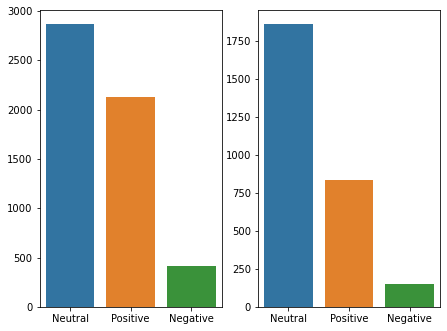

In [29]:
plt.figure(figsize=(15, 12))
ax1 = plt.subplot2grid(shape=(2,4), loc = (0,0))
ax2 = plt.subplot2grid(shape=(2,4), loc = (0,1))

sns.barplot(x = df_apple['Emotion'].value_counts().index,
           y = df_apple['Emotion'].value_counts().values,
           ax =ax1)
ax1.set_xticklabels(['Neutral', 'Positive', 'Negative'])

sns.barplot(x = df_google['Emotion'].value_counts().index,
           y = df_google['Emotion'].value_counts().values,
           ax = ax2)
ax2.set_xticklabels(['Neutral', 'Positive', 'Negative']);

<AxesSubplot:>

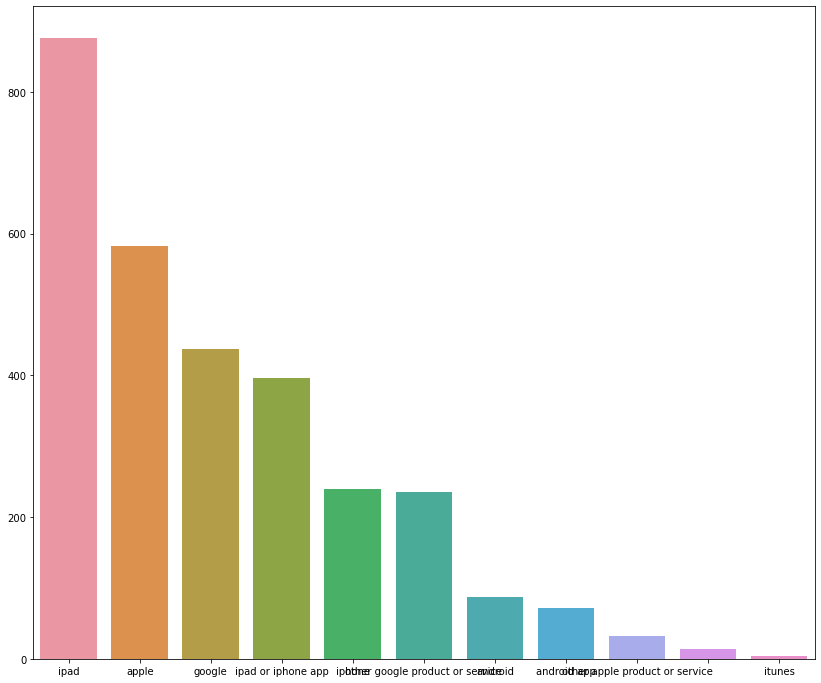

In [30]:
plt.figure(figsize=(14,12))

sns.barplot(x = df_pos['test'].value_counts().index,
           y = df_pos['test'].value_counts().values)

<AxesSubplot:>

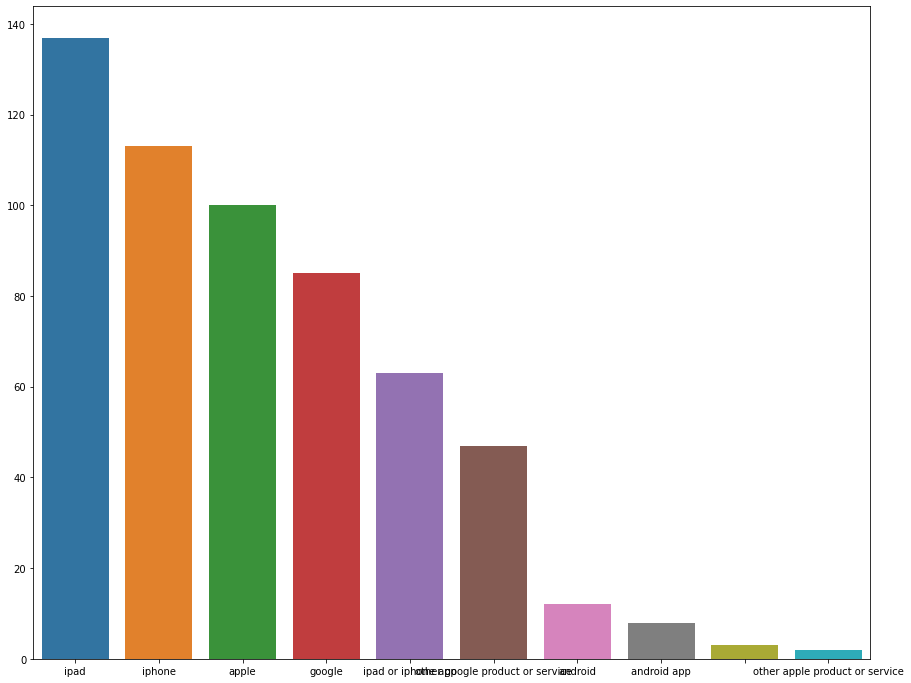

In [31]:
plt.figure(figsize=(15,12))

sns.barplot(x = df_neg['test'].value_counts().index,
           y = df_neg['test'].value_counts().values)

In [32]:
!pip install wordcloud

In [42]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

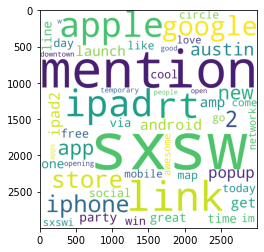

In [45]:
wc = WordCloud(background_color="white",width=3000,height=3000, max_words=50,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(pos_dict)
plt.imshow(wc)

In [ ]:
pos_dict

### Models

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df.Text
y = df.target

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

X_train = X_train.str.join(' ')
X_test = X_test.str.join(' ')

In [37]:
tfidf = TfidfVectorizer(stop_words=sw, ngram_range = (1,3))
X_train_vec = tfidf.fit_transform(X_train)
X_train_vec = pd.DataFrame.sparse.from_spmatrix(X_train_vec)
X_train_vec.columns = sorted(tfidf.vocabulary_)
X_train_vec.set_index(y_train.index, inplace=True)

In [38]:
X_val_vec = tfidf.transform(X_test)
X_val_vec = pd.DataFrame.sparse.from_spmatrix(X_val_vec)
X_val_vec.columns = sorted(tfidf.vocabulary_)
X_val_vec.set_index(y_test.index, inplace=True)

In [39]:
df_vec = pd.DataFrame(X.toarray(), columns = tfidf.get_feature_names())
df_vec

AttributeError: 'Series' object has no attribute 'toarray'

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train_vec, y_train)
y_hat = mnb.predict(X_train_vec)

In [ ]:
print(confusion_matrix(y_train, y_hat))

In [ ]:
print(accuracy_score(y_train, y_hat))